In [1]:
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

from keras.preprocessing import image

In [2]:
train_dir=r"C:\Users\razas\Downloads\DEEP Learning\CNN\Computer Vision Project\Computer Vision Project\Dataset\train"
test_dir=r"C:\Users\razas\Downloads\DEEP Learning\CNN\Computer Vision Project\Computer Vision Project\Dataset\validation"

In [3]:
train_dir

'C:\\Users\\razas\\Downloads\\DEEP Learning\\CNN\\Computer Vision Project\\Computer Vision Project\\Dataset\\train'

# image preprocessing with imagedatagenerator



In [4]:
train_datagen=ImageDataGenerator(width_shift_range=0.1,
                                height_shift_range=0.1,
                                horizontal_flip=True,
                                rescale=1./255,
                                validation_split=0.2)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                       validation_split=0.2)

# set the directory

In [5]:
train_generator=train_datagen.flow_from_directory(directory=train_dir,
                                                 target_size=(48,48),
                                                 batch_size=64,
                                                 color_mode="grayscale",
                                                 class_mode="categorical",
                                                 subset="training")

validation_generator=validation_datagen.flow_from_directory(directory=test_dir,
                                                 target_size=(48,48),
                                                 batch_size=64,
                                                 color_mode="grayscale",
                                                 class_mode="categorical",
                                                 subset="validation")

Found 1522 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


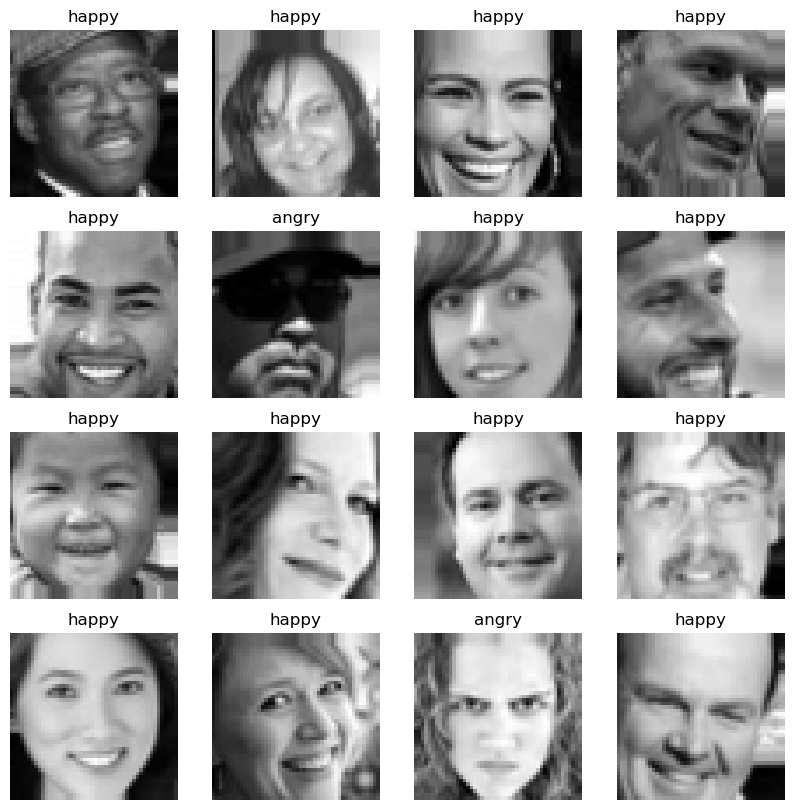

In [6]:
import matplotlib.pyplot as plt

batch=next(train_generator)

fig,axes=plt.subplots(nrows=4 ,ncols=4,figsize=(10,10))
                      
for i, ax in enumerate(axes.flat):
    
    ax.imshow(batch[0][i],cmap="gray")
    label_idx=batch[1][i].argmax()
    label_map={v:k for k,v in train_generator.class_indices.items()}
                      
    ax.set_title(label_map[label_idx])
    ax.axis("off")
                      
plt.show()

# modelling

# cnn

In [7]:
c

NameError: name 'c' is not defined

In [ ]:
checkpoint_callback=ModelCheckpoint(
filepath = "model.weights.h5",
monitor='val_accuracy',
save_best_only=True,
save_weights_only=True,
mode="max",
verbose=1
)

history=model.fit(
train_generator,
batch_size=64,
epochs=10,
validation_data=validation_generator,
callbacks=[checkpoint_callback]
)

# Evaluation

In [ ]:
validation_loss,validation_acc=model.evaluate(validation_generator)
print("Validation loss",validation_loss,"\t Validation accuracy : ",validation_acc)

# traininigg and validaton loss curves

In [ ]:
train_loss=history.history["loss"]
val_loss = history.history['val_loss']
epochs=range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,"bo",label="Training loss")

plt.plot(epochs,val_loss,"b",label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [ ]:
train_acc=history.history["accuracy"]
val_loss = history.history['val_accuracy']

plt.plot(epochs,train_loss,"bo",label="Training accuracy")

plt.plot(epochs,val_loss,"b",label="Validation accuracy")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

validation_labels=validation_generator.classes
validation_pred_probs=model.predict(validation_generator)
validation_pred_labels=np.argmax(validation_pred_probs,axis=1)

confusion_mtx=confusion_matrix(validation_labels,validation_pred_labels)
class_names=list(train_generator.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx,annot=True,fmt="d",cmap="YlGnBu",
           xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True  Label")
plt.title('Confusion Matrix')
plt.show()

In [ ]:
img_path=r"C:\Users\razas\Downloads\DEEP Learning\CNN\Computer Vision Project\Computer Vision Project\Dataset\validation\happy\9845.jpg"
img=image.load_img(img_path,target_size=(48,48),color_mode="grayscale")
img_array = image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
prediction =model.predict(img_array)
label_map={v:k for k,v in train_generator.class_indices.items()}
predicted_label=label_map[np.argmax(prediction)]
print("Emotion predicated of this image is ",predicted_label)

In [ ]:
img

In [ ]:
img_path=r"C:\Users\razas\Downloads\DEEP Learning\CNN\Computer Vision Project\Computer Vision Project\Dataset\validation\angry\9400.jpg"
img=image.load_img(img_path,target_size=(48,48),color_mode="grayscale")
img_array = image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.
prediction =model.predict(img_array)
label_map={v:k for k,v in train_generator.class_indices.items()}
predicted_label=label_map[np.argmax(prediction)]
print("Emotion predicated of this image is ",predicted_label)

In [ ]:
img